Parameters of the Largest Circle:
Center: (1342, 641)
Radius: 40
Range of Sigma Values Used: 10.0 to 40.0


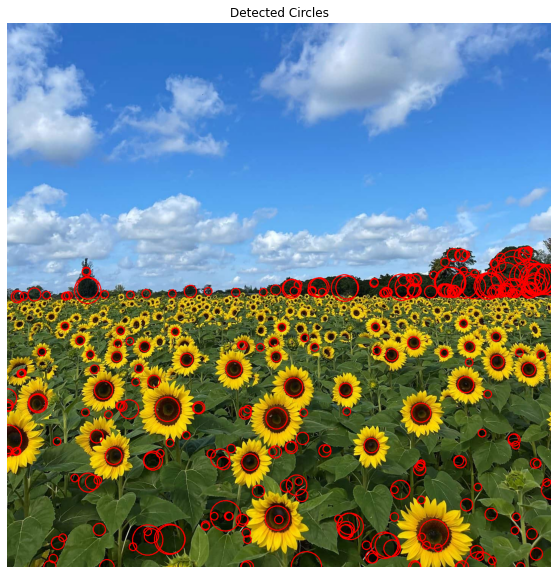

In [3]:
import cv2 as cv
import numpy as np
from scipy.ndimage import maximum_filter
import matplotlib.pyplot as plt


im = cv.imread("./the_berry_farms_sunflower_field (1).jpeg", cv.IMREAD_COLOR)


gray_im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Define a range of sigma values
sigma_values = np.linspace(10, 40, 20)

# Initialize an array to store the scale space
scale_space = []

for sigma in sigma_values:
    # Calculate the LoG kernel for the current sigma
    kernel_size = int(4 * sigma) + 1
    kernel_hw = kernel_size // 2
    X, Y = np.meshgrid(np.arange(-kernel_hw, kernel_hw + 1), np.arange(-kernel_hw, kernel_hw + 1))
    log_kernel = (X ** 2 + Y ** 2 - 2 * sigma ** 2) * np.exp(-(X ** 2 + Y ** 2) / (2 * sigma ** 2))

    # Apply LoG filtering to the grayscale image
    log_response = cv.filter2D(gray_im.astype(np.float32), -1, log_kernel)

    # Store the result in the scale space
    scale_space.append(log_response)

# Convert the scale space to a numpy array
scale_space = np.array(scale_space)

# Find local maxima in the scale space using a maximum filter
local_maxima = maximum_filter(scale_space, size=(3, 3, 3))

# Identify the coordinates of the local maxima
maxima_coordinates = np.argwhere((scale_space == local_maxima) & (local_maxima > 0))

detected_circles = []

for coord in maxima_coordinates:
    z, y, x = coord
    radius = int(1 * sigma_values[z])  # Adjust the scale factor as needed
    center = (x, y)
    detected_circles.append((center, radius))

largest_circle = max(detected_circles, key=lambda x: x[1])
largest_center, largest_radius = largest_circle
print("Parameters of the Largest Circle:")
print("Center:", largest_center)
print("Radius:", largest_radius)
print("Range of Sigma Values Used:", sigma_values[0], "to", sigma_values[-1])

# Draw detected circles on the original image
output_image = im.copy()
for circle in detected_circles:
    center, radius = circle
    cv.circle(output_image, center, radius, (0, 0, 255), 2)  # Draw circles in red

# Convert BGR image to RGB for Matplotlib
output_image_rgb = cv.cvtColor(output_image, cv.COLOR_BGR2RGB)

# Display the image with detected circles using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(output_image_rgb)
plt.title("Detected Circles")
plt.axis('off')
plt.show()
